In [16]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
os.chdir("/content/drive/MyDrive/") #更改路徑
os.getcwd() #查看當前路徑

'/content/drive/MyDrive'

**VGG16**

In [18]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [19]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/dogs-vs-cats (1)'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator (rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros (shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode= 'binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict (inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i,end=' ')
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

In [20]:
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape (test_features, (1000, 4 * 4 * 512))

In [21]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential ()
model.add(layers .Dense(256, activation='relu', input_dim=4 * 4 * 512))
model .add (layers . Dropout (0.5) )
model .add(layers .Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss= 'binary_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 0s 5ms/step - loss: 0.6150 - acc: 0.6560 - val_loss: 0.4499 - val_acc: 0.8100
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4364 - acc: 0.8025 - val_loss: 0.3608 - val_acc: 0.8550
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3480 - acc: 0.8490 - val_loss: 0.3230 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3129 - acc: 0.8695 - val_loss: 0.2973 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2845 - acc: 0.8875 - val_loss: 0.2807 - val_acc: 0.8890
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2672 - acc: 0.8970 - val_loss: 0.2724 - val_acc: 0.8910
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2434 - acc: 0.9070 - val_loss: 0.2623 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

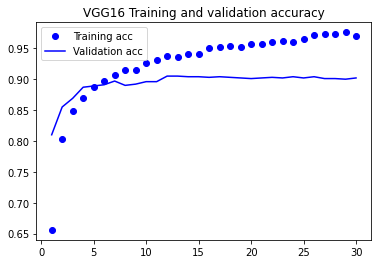

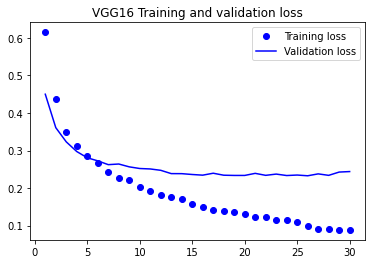

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('VGG16 Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('VGG16 Training and validation loss')
plt.legend()
plt.show()

**Xception**

In [29]:
from keras.applications import Xception
conv_base = Xception(weights='imagenet',
include_top=False,
input_shape=(150, 150,3))
conv_base.summary()

import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/dogs-vs-cats (1)'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator (rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 5, 5, 2048))
  labels = np.zeros (shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode= 'binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict (inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i,end=' ')
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features,(2000,5*5*2048))
validation_features = np.reshape(validation_features, (1000, 5*5*2048))
test_features = np.reshape (test_features, (1000, 5*5*2048))




Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

Epoch 1/30
100/100 [==============================] - 1s 11ms/step - loss: 0.1357 - acc: 0.9500 - val_loss: 0.0967 - val_acc: 0.9680
Epoch 2/30
100/100 [==============================] - 1s 10ms/step - loss: 0.0711 - acc: 0.9755 - val_loss: 0.1077 - val_acc: 0.9620
Epoch 3/30
100/100 [==============================] - 1s 9ms/step - loss: 0.0473 - acc: 0.9840 - val_loss: 0.1110 - val_acc: 0.9690
Epoch 4/30
100/100 [==============================] - 1s 10ms/step - loss: 0.0342 - acc: 0.9885 - val_loss: 0.1301 - val_acc: 0.9600
Epoch 5/30
100/100 [==============================] - 1s 10ms/step - loss: 0.0202 - acc: 0.9920 - val_loss: 0.1200 - val_acc: 0.9620
Epoch 6/30
100/100 [==============================] - 1s 10ms/step - loss: 0.0116 - acc: 0.9955 - val_loss: 0.1248 - val_acc: 0.9680
Epoch 7/30
100/100 [==============================] - 1s 9ms/step - loss: 0.0081 - acc: 0.9970 - val_loss: 0.2334 - val_acc: 0.9540
Epoch 8/30
100/100 [==============================] - 1s 10ms/step - lo

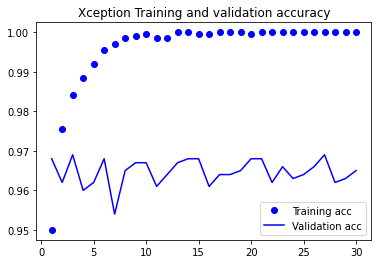

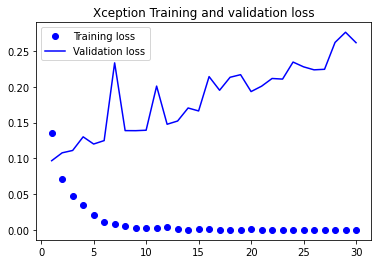

In [30]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential ()
model.add(layers .Dense(256, activation='relu', input_dim= 5*5*2048))
model .add (layers . Dropout (0.5) )
model .add(layers .Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss= 'binary_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Xception Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Xception Training and validation loss')
plt.legend()
plt.show()

**Inception V3**

In [31]:
from keras.applications import InceptionV3
conv_base = InceptionV3(weights='imagenet',
include_top=False,
input_shape=(150, 150,3))
conv_base.summary()

87916544/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 74, 74, 32)   96          conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization_16[0][0]     
______________________

In [32]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/dogs-vs-cats (1)'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator (rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 3, 3, 2048))
  labels = np.zeros (shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode= 'binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict (inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i,end=' ')
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features,(2000,3*3*2048))
validation_features = np.reshape(validation_features, (1000, 3*3*2048))
test_features = np.reshape (test_features, (1000, 3*3*2048))

Found 2000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3366 - acc: 0.8850 - val_loss: 0.1680 - val_acc: 0.9400
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.1484 - acc: 0.9480 - val_loss: 0.1488 - val_acc: 0.9580
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0901 - acc: 0.9650 - val_loss: 0.1631 - val_acc: 0.9570
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0634 - acc: 0.9795 - val_loss: 0.1502 - val_acc: 0.9590
Epoch 5/30
100/100 [==============================] - 1s 5ms/step - loss: 0.0599 - acc: 0.9765 - val_loss: 0.1467 - val_acc: 0.9530
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0343 - acc: 0.9875 - val_loss: 0.1868 - val_acc: 0.9600
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0190 - acc: 0.9935 - val_loss: 0.1809 - val_acc: 0.9620
Epoch 8/30
100/100 [==============================] - 1s 5ms/step - loss: 0.

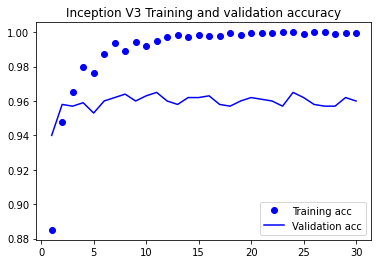

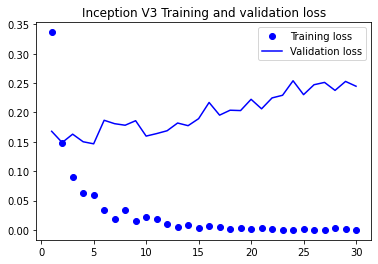

In [33]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential ()
model.add(layers .Dense(256, activation='relu', input_dim= 3*3*2048))
model .add (layers . Dropout (0.5) )
model .add(layers .Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss= 'binary_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Inception V3 Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Inception V3 Training and validation loss')
plt.legend()
plt.show()

**ResNet50**

In [34]:
from keras.applications import ResNet50
conv_base = ResNet50(weights='imagenet',
include_top=False,
input_shape=(150, 150,3))
conv_base.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
__________________________

In [35]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/dogs-vs-cats (1)'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator (rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 5, 5, 2048))
  labels = np.zeros (shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode= 'binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict (inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i,end=' ')
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features,(2000,5*5*2048))
validation_features = np.reshape(validation_features, (1000, 5*5*2048))
test_features = np.reshape (test_features, (1000, 5*5*2048))

Found 2000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

Epoch 1/30
100/100 [==============================] - 1s 11ms/step - loss: 0.7282 - acc: 0.5505 - val_loss: 0.6517 - val_acc: 0.6380
Epoch 2/30
100/100 [==============================] - 1s 10ms/step - loss: 0.6780 - acc: 0.5810 - val_loss: 0.6496 - val_acc: 0.6180
Epoch 3/30
100/100 [==============================] - 1s 10ms/step - loss: 0.6685 - acc: 0.5925 - val_loss: 0.6385 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 1s 10ms/step - loss: 0.6618 - acc: 0.5910 - val_loss: 0.6528 - val_acc: 0.5880
Epoch 5/30
100/100 [==============================] - 1s 9ms/step - loss: 0.6536 - acc: 0.6055 - val_loss: 0.6301 - val_acc: 0.6430
Epoch 6/30
100/100 [==============================] - 1s 9ms/step - loss: 0.6462 - acc: 0.6195 - val_loss: 0.6297 - val_acc: 0.6410
Epoch 7/30
100/100 [==============================] - 1s 10ms/step - loss: 0.6471 - acc: 0.6280 - val_loss: 0.6706 - val_acc: 0.5570
Epoch 8/30
100/100 [==============================] - 1s 10ms/step - lo

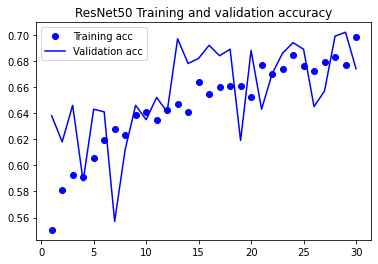

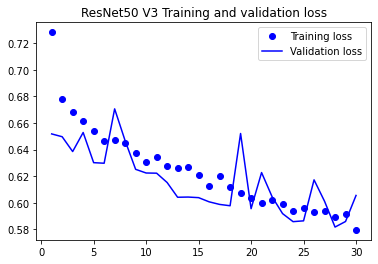

In [37]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential ()
model.add(layers .Dense(256, activation='relu', input_dim= 5*5*2048))
model .add (layers . Dropout (0.5) )
model .add(layers .Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss= 'binary_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('ResNet50 Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('ResNet50 V3 Training and validation loss')
plt.legend()
plt.show()

**VGG19**

In [38]:
from keras.applications import VGG19
conv_base = VGG19(weights='imagenet',
include_top=False,
input_shape=(150, 150,3))
conv_base.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [39]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/dogs-vs-cats (1)'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator (rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros (shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode= 'binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict (inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i,end=' ')
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape (test_features, (1000, 4*4*512))

Found 2000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

Epoch 1/30
100/100 [==============================] - 0s 5ms/step - loss: 0.6482 - acc: 0.6325 - val_loss: 0.4854 - val_acc: 0.8120
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4761 - acc: 0.7755 - val_loss: 0.4025 - val_acc: 0.8320
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4071 - acc: 0.8190 - val_loss: 0.3648 - val_acc: 0.8450
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3546 - acc: 0.8515 - val_loss: 0.3395 - val_acc: 0.8590
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3282 - acc: 0.8635 - val_loss: 0.3219 - val_acc: 0.8640
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3009 - acc: 0.8775 - val_loss: 0.3096 - val_acc: 0.8730
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2830 - acc: 0.8890 - val_loss: 0.2974 - val_acc: 0.8760
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

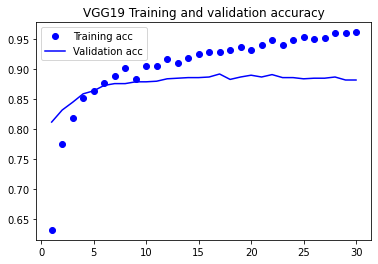

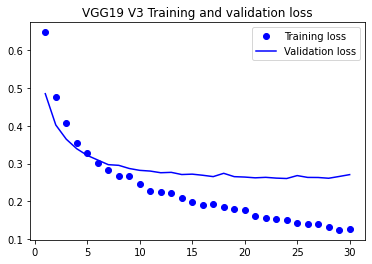

In [40]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential ()
model.add(layers .Dense(256, activation='relu', input_dim= 4*4*512))
model .add (layers . Dropout (0.5) )
model .add(layers .Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss= 'binary_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('VGG19 Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('VGG19 V3 Training and validation loss')
plt.legend()
plt.show()

**MobileNet**

In [41]:
from keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet',
include_top=False,
input_shape=(150, 150,3))
conv_base.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________

In [42]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/dogs-vs-cats (1)'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator (rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 1024))
  labels = np.zeros (shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode= 'binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict (inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    print(i,end=' ')
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features,(2000,4*4*1024))
validation_features = np.reshape(validation_features, (1000, 4*4*1024))
test_features = np.reshape (test_features, (1000, 4*4*1024))

Found 2000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3907 - acc: 0.8865 - val_loss: 0.1112 - val_acc: 0.9540
Epoch 2/30
100/100 [==============================] - 0s 5ms/step - loss: 0.1173 - acc: 0.9585 - val_loss: 0.0989 - val_acc: 0.9610
Epoch 3/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0750 - acc: 0.9685 - val_loss: 0.1062 - val_acc: 0.9690
Epoch 4/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0305 - acc: 0.9895 - val_loss: 0.1015 - val_acc: 0.9620
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0316 - acc: 0.9890 - val_loss: 0.1051 - val_acc: 0.9640
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0114 - acc: 0.9955 - val_loss: 0.1168 - val_acc: 0.9700
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.0141 - acc: 0.9960 - val_loss: 0.1123 - val_acc: 0.9670
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.

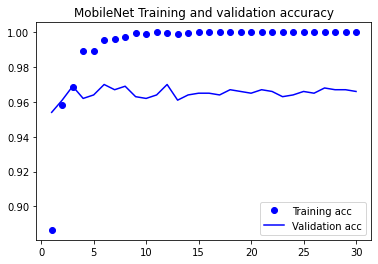

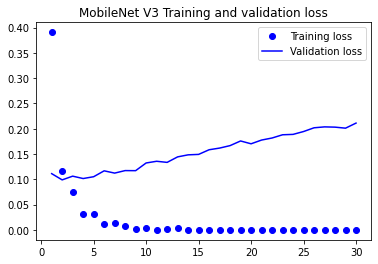

In [43]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential ()
model.add(layers .Dense(256, activation='relu', input_dim= 4*4*1024))
model .add (layers . Dropout (0.5) )
model .add(layers .Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss= 'binary_crossentropy',
metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('MobileNet Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('MobileNet V3 Training and validation loss')
plt.legend()
plt.show()